In [1]:
import pandas as pd
import numpy as np
import h5py
file=h5py.File('/kaggle/input/classification-of-handwritten-letters/LetterColorImages_123.h5')
clms=list(file.keys())
clms

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


['backgrounds', 'images', 'labels']

In [2]:
background=np.array(file[clms[0]])
img=np.array(file[clms[1]])
labels=np.array(file[clms[2]])
n=len(img)
images=img.reshape(n,32,32,3)
images=images/255

<function matplotlib.pyplot.show(*args, **kw)>

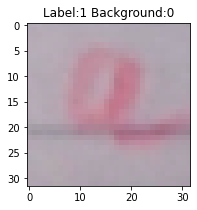

In [3]:
import pylab as pl
pl.figure(figsize=(3,3))
var=1
pl.title('Label:%s'%labels[var]+' Background:%s'%background[var])
pl.imshow(images[var])
pl.show

In [4]:
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
num_labels=33
y=OneHotEncoder(categories='auto')
y=y.fit_transform(labels.reshape(-1,1)).toarray().astype('int64')
x=images
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_labels,activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
history=model.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_data=(X_test,y_test))

Epoch 1/50
178/178 [==============================] - 2s 10ms/step - loss: 3.4674 - accuracy: 0.0369 - val_loss: 3.3493 - val_accuracy: 0.0814
Epoch 2/50
178/178 [==============================] - 2s 8ms/step - loss: 2.9585 - accuracy: 0.1751 - val_loss: 2.3864 - val_accuracy: 0.3598
Epoch 3/50
178/178 [==============================] - 1s 8ms/step - loss: 2.2738 - accuracy: 0.3559 - val_loss: 1.9581 - val_accuracy: 0.4644
Epoch 4/50
178/178 [==============================] - 2s 9ms/step - loss: 1.8014 - accuracy: 0.4893 - val_loss: 1.3855 - val_accuracy: 0.6163
Epoch 5/50
178/178 [==============================] - 2s 8ms/step - loss: 1.4431 - accuracy: 0.5770 - val_loss: 1.1531 - val_accuracy: 0.6751
Epoch 6/50
178/178 [==============================] - 2s 9ms/step - loss: 1.2359 - accuracy: 0.6340 - val_loss: 1.0613 - val_accuracy: 0.7005
Epoch 7/50
178/178 [==============================] - 2s 9ms/step - loss: 1.0974 - accuracy: 0.6716 - val_loss: 0.9938 - val_accuracy: 0.7241
Epoch

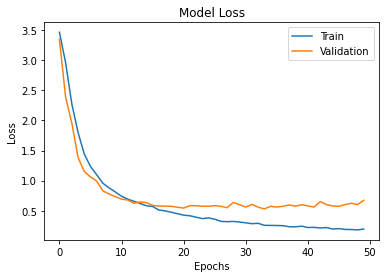

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

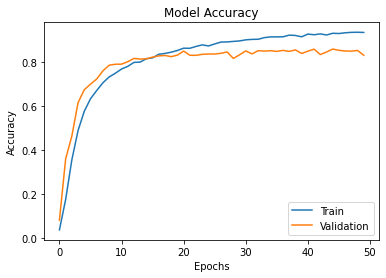

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [10]:
model.load_weights('../input/best-weights/best_weights.hdf5')
model.evaluate(X_train,y_train)

355/355 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9905


[0.05776790529489517, 0.9904862642288208]

In [11]:
import matplotlib.pyplot as plt
import glob
import imageio
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def import_data(path,csv_file):
    data = pd.read_csv(path + csv_file)
    data['source'] = csv_file[:-4] + '/'
    return data

#Creating a Dataframe:
path = '../input/classification-of-handwritten-letters/'
csv_files = ['letters.csv','letters2.csv','letters3.csv']
data1 = import_data(path,csv_files[0])
data2 = import_data(path,csv_files[1])
data3 = import_data(path,csv_files[2])
data = pd.concat([data1,data2,data3],ignore_index=True)


del(data1,data2,data3)

In [12]:
data.head()

,letter,label,file,background,source
0,а,1,01_01.png,0,letters/
1,а,1,01_02.png,0,letters/
2,а,1,01_03.png,0,letters/
3,а,1,01_04.png,0,letters/
4,а,1,01_05.png,0,letters/


In [13]:
data.tail()

,letter,label,file,background,source
14185,я,33,33_426.png,3,letters3/
14186,я,33,33_427.png,3,letters3/
14187,я,33,33_428.png,3,letters3/
14188,я,33,33_429.png,3,letters3/
14189,я,33,33_430.png,3,letters3/


In [14]:
all_letters=''
for i in data.letter.unique():
    all_letters+=i
print(all_letters)


абвгдеёжзийклмнопрстуфхцчшщъыьэюя


In [15]:
import os
def to_img(filename):
    img = load_img(filename,target_size=(32,32))
    img = img_to_array(img)
    img = img.reshape(1,32,32,3)
    img = img.astype('float32')
    img = img/255.0
    return img

def actual_value(filename,df,column_name):
    file = os.path.basename(os.path.normpath(filename))
    index_row = df[df['file']==file].index[0]
    return df.loc[index_row,column_name]

predicted: з
actual: з


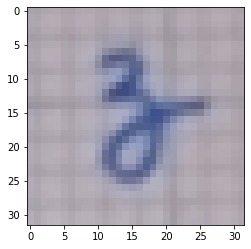

In [16]:
test_img = to_img(path+'letters3/09_236.png')
predicted_letter = model.predict_classes(test_img)
plt.imshow(test_img[0])
print('predicted:',all_letters[predicted_letter[0]])
print('actual:',actual_value(path+'letters3/09_236.png',data,'letter'))

predicted: к
actual:k


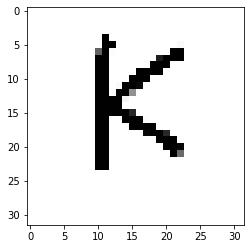

In [17]:
my_path = '../input/letter-k2/k2.jpg'
test_img = to_img(my_path)
predicted_letter = model.predict_classes(test_img)
plt.imshow(test_img[0])
print('predicted:',all_letters[predicted_letter[0]])
print('actual:k')